In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_loan_sansaction.csv')

In [3]:
df = df.drop('Unnamed: 0' , axis=1)
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Credit_History,Gender_Male,Self_Employed_Yes,Education_Not Graduate,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4583,1508.0,128.0,360.0,N,1.0,True,False,False,True,False,True,False,False,True,False,False
1,3000,0.0,66.0,360.0,Y,1.0,True,True,False,True,True,False,False,False,False,False,True
2,2583,2358.0,120.0,360.0,Y,1.0,True,False,True,True,True,False,False,False,False,False,True
3,6000,0.0,141.0,360.0,Y,1.0,True,False,False,False,True,False,False,False,False,False,True
4,2333,1516.0,95.0,360.0,Y,1.0,True,False,True,True,True,False,False,False,False,False,True


In [4]:
X = df.drop('Loan_Status' , axis=1)
y = df['Loan_Status']

<Axes: xlabel='count', ylabel='Loan_Status'>

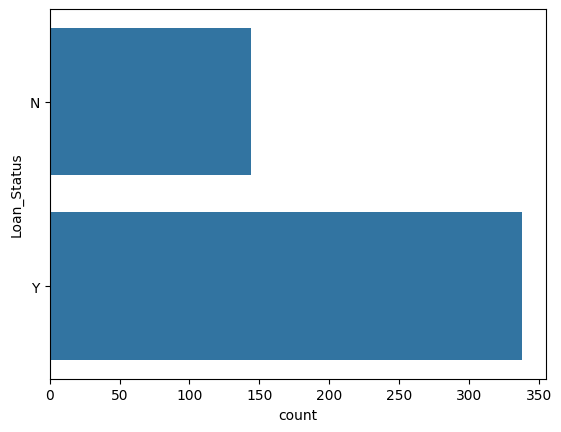

In [5]:
sns.countplot(data=y)

<mark>The data is highly imbalanced which is not good for a classification model</mark>

<h3><mark>Synthetic data generated by SMOTE</mark></h3>

In [6]:
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
smote = SMOTE()
X, y = smote.fit_resample(X, y)

<Axes: xlabel='count', ylabel='Loan_Status'>

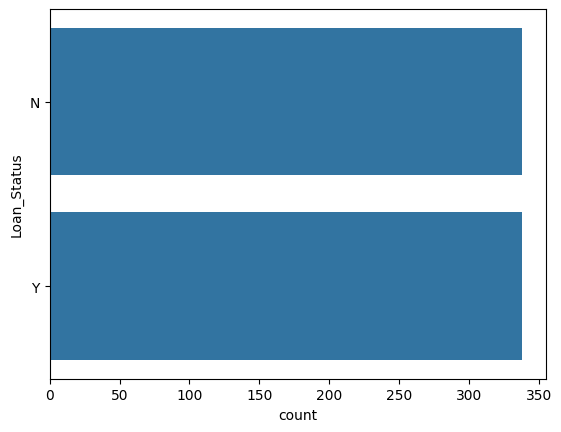

In [7]:
sns.countplot(data=y)

In [8]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score

<h3><mark>Defining a function run a evaluate the models</mark></h3>

In [9]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    # Get Metrics
    preds = model.predict(X_test)
    print("accuracy " , accuracy_score(y_test,preds)*100)
    print(classification_report(y_test,preds))
    ConfusionMatrixDisplay.from_predictions(y_test,preds)

<h3><mark>Train Test Split and StandardScaler the data</mark></h3>

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
standard = StandardScaler()

In [14]:
standard.fit(X_train)

StandardScaler()

In [15]:
X_train = standard.transform(X_train)
X_test = standard.transform(X_test)

<h3><mark>Support Vector Classifier</mark></h3>

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [17]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf']}
grid_SVR = GridSearchCV(svm,param_grid)

accuracy  85.26785714285714
              precision    recall  f1-score   support

           N       0.97      0.70      0.82       104
           Y       0.79      0.98      0.88       120

    accuracy                           0.85       224
   macro avg       0.88      0.84      0.85       224
weighted avg       0.88      0.85      0.85       224



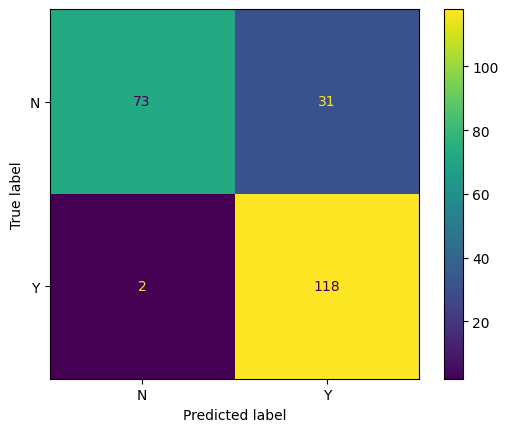

In [18]:
run_model(grid_SVR,X_train,y_train,X_test,y_test)

In [19]:
grid_SVR.best_params_

{'C': 0.1, 'kernel': 'linear'}

<h3><mark>Random Forest Classifier</mark></h3>

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rf = RandomForestClassifier()

In [22]:
n_estimators=[1,64,100,128]
max_features= [2,3,4]
bootstrap = [True,False]

In [23]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap}  # Note, oob_score only makes sense when bootstrap=True!

In [24]:
grid_RF = GridSearchCV(rf,param_grid)

accuracy  83.03571428571429
              precision    recall  f1-score   support

           N       0.86      0.76      0.81       104
           Y       0.81      0.89      0.85       120

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224



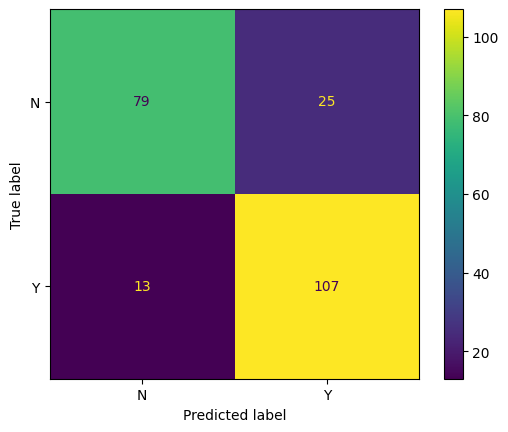

In [25]:
run_model(grid_RF,X_train,y_train,X_test,y_test)

In [26]:
grid_RF.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64}

<h3><mark>Based on above Comparison Random Forest has best performance</mark></h3>

The Random Forest has better recall for the "N" class and a balanced performance across both classes, making it a more robust choice

and ensure fewer false negatives for the "N" class.

In [27]:
grid_RF.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 64}

In [28]:
preds = grid_RF.predict(X_test)

              precision    recall  f1-score   support

           N       0.86      0.76      0.81       104
           Y       0.81      0.89      0.85       120

    accuracy                           0.83       224
   macro avg       0.83      0.83      0.83       224
weighted avg       0.83      0.83      0.83       224



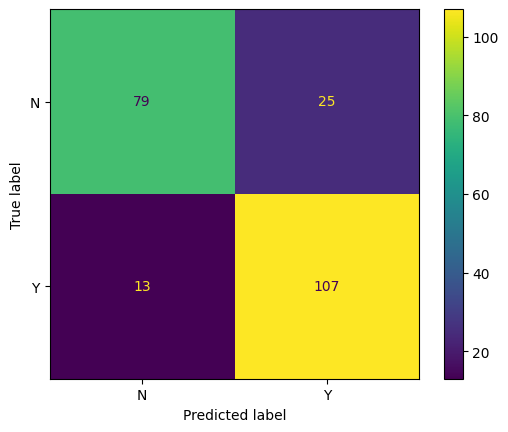

In [29]:
print(classification_report(y_test,preds))
ConfusionMatrixDisplay.from_predictions(y_test,preds)